# Advanced Regression Assignment

# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

# Business Goal 

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Filtering out the warnings
import warnings
warnings.filterwarnings("ignore")

# For all the columns and rows printed properly
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)

# Importing the libraries for model building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
#Reading csv file using read_csv
house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check the number of rows and columns in the dataframe
house.shape

(1460, 81)

In [4]:
# Check the column-wise info of the dataframe
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From above we can see that a lot of null values present, but the values are not actually null. They have some meaning as per the Data description

In [5]:
# Check the summary for the numeric columns 
house.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
#Checking total columns in the dataframe
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Step 2: Data Quality Check 

In [7]:
# Checking for duplicate 'Id'

sum(house.duplicated(['Id'])==True)

0

#### Checking Missing Values

In [8]:
# checking missing value percentage wise in each column
total=house.isnull().sum().sort_values(ascending=False)
percent=(house.isnull().sum().sort_values(ascending=False) * 100/house.shape[0]).round(2)
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


From above missing value checking and data description file provided, we have the knowledge for the NAN values present in various columns. Imputing with other value might prevent it from getting ignored, so that it can actually contribute to the house pricing prediction.

#### Imputing Missing Values

Places where NaN values have some meaning

In [9]:
#Checking for Alley Variable
house.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [10]:
#Checking unique value for Alley Variable 
house.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [11]:
#Checking for BsmtCond Variable
house.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [12]:
#the columns which has NAN which actually has a meaning
null_cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [13]:
for i in null_cols:
    house[i].fillna("None", inplace=True)
    house[i].fillna("None", inplace=True)

In [14]:
# checking the info of the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Now from above we can see that the number of null values has decreased in huge quantity

In [15]:
# checking missing value percentage wise in each column
total=house.isnull().sum().sort_values(ascending=False)
percent=(house.isnull().sum().sort_values(ascending=False) * 100/house.shape[0]).round(2)
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data.head()

,Total,Percent
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrType,8,0.55
MasVnrArea,8,0.55
Electrical,1,0.07


According to data description file 'LotFrontage' is  Linear feet of street connected to property, which is not very important 
variable also have a lot of missing value so we can drop it

In [16]:
# Dropping 'LotFrontage' variable
house = house.drop('LotFrontage', axis=1)

In [17]:
# checking missing value percentage wise in each column
total=house.isnull().sum().sort_values(ascending=False)
percent=(house.isnull().sum().sort_values(ascending=False) * 100/house.shape[0]).round(2)
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data.head()

,Total,Percent
GarageYrBlt,81,5.55
MasVnrType,8,0.55
MasVnrArea,8,0.55
Electrical,1,0.07
SalePrice,0,0.00


Above 'MasVnrArea' is Masonry veneer area in square feet and 'GarageYrBlt' is Year garage was built,these are numerical value so replaced by median

In [18]:
# GarageYrBlt and MasVnrArea are imputed by their median
house['GarageYrBlt'].fillna(house['GarageYrBlt'].median(), inplace=True)
house['MasVnrArea'].fillna(house['MasVnrArea'].median(), inplace=True)

In [19]:
# checking missing value percentage wise in each column
total=house.isnull().sum().sort_values(ascending=False)
percent=(house.isnull().sum().sort_values(ascending=False) * 100/house.shape[0]).round(2)
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data.head()

,Total,Percent
MasVnrType,8,0.55
Electrical,1,0.07
SalePrice,0,0.00
Foundation,0,0.00
RoofMatl,0,0.00


MasVnrType have very less number of null values so we can drop null value of the dataframe

In [20]:
# dropping null value of dataframe 
house = house.dropna()

In [21]:
# checking missing value percentage wise in each column
total=house.isnull().sum().sort_values(ascending=False)
percent=(house.isnull().sum().sort_values(ascending=False) * 100/house.shape[0]).round(2)
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data.head()

,Total,Percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


From above we can observe that all missing values are treated

In [22]:
# checking the shape of the dataframe
house.shape

(1451, 80)

#### Treating year variable

In [23]:
# Treating year variable 
house['YearBuilt_old']=pd.datetime.now().year-house['YearBuilt']
house['GarageYrBlt_old']=pd.datetime.now().year-house['GarageYrBlt']
house['YearRemodAdd_old']=pd.datetime.now().year-house['YearRemodAdd']
house['YrSold_old']=pd.datetime.now().year-house['YrSold']

In [24]:
# Checking sample value of year variable
house[['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold','YearBuilt_old','GarageYrBlt_old','YearRemodAdd_old','YrSold_old']].sample(10)

,YearBuilt,GarageYrBlt,YearRemodAdd,YrSold,YearBuilt_old,GarageYrBlt_old,YearRemodAdd_old,YrSold_old
947,2002,2002.0,2003,2007,19,19.0,18,14
1086,1973,1973.0,1973,2010,48,48.0,48,11
1191,1999,1999.0,2000,2007,22,22.0,21,14
448,1937,1937.0,1950,2006,84,84.0,71,15
1319,1954,1954.0,1954,2007,67,67.0,67,14
532,1955,1967.0,2007,2010,66,54.0,14,11
129,1958,1998.0,1991,2006,63,23.0,30,15
809,1898,1910.0,1965,2009,123,111.0,56,12
0,2003,2003.0,2003,2008,18,18.0,18,13
240,2008,2008.0,2008,2010,13,13.0,13,11


In [25]:
# Dropping 'YearBuilt','GarageYrBlt','YearRemodAdd','YrSold' year variable
house=house.drop(['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold'],axis=1)

#### Converting categorical columns 

In [26]:
# Checking 'BsmtHalfBath'
house['BsmtHalfBath'].value_counts()

0    1369
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [27]:
# Checking 'FullBath'
house['FullBath'].value_counts()

2    761
1    649
3     32
0      9
Name: FullBath, dtype: int64

In [28]:
# Checking 'BedroomAbvGr'
house['BedroomAbvGr'].value_counts()  

3    800
2    356
4    211
1     49
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [29]:
# Checking 'Fireplaces'
house['Fireplaces'].value_counts()  

0    685
1    648
2    113
3      5
Name: Fireplaces, dtype: int64

After checking some variable we have found some variable are categorical but data type given as integer

In [30]:
# Creating categorical column list which data types have given as int and we can convert it in to object type
var=['MSSubClass','OverallQual', 'OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']

In [31]:
for i in var:
    house[var]=house[var].astype("object")

In [32]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1451 non-null   int64  
 1   MSSubClass        1451 non-null   object 
 2   MSZoning          1451 non-null   object 
 3   LotArea           1451 non-null   int64  
 4   Street            1451 non-null   object 
 5   Alley             1451 non-null   object 
 6   LotShape          1451 non-null   object 
 7   LandContour       1451 non-null   object 
 8   Utilities         1451 non-null   object 
 9   LotConfig         1451 non-null   object 
 10  LandSlope         1451 non-null   object 
 11  Neighborhood      1451 non-null   object 
 12  Condition1        1451 non-null   object 
 13  Condition2        1451 non-null   object 
 14  BldgType          1451 non-null   object 
 15  HouseStyle        1451 non-null   object 
 16  OverallQual       1451 non-null   object 


#### Outliers Treatment

In [33]:
# Checking and creating numerical variable list
types_house=house.dtypes
house_num=types_house[(types_house=="int64") | (types_house=="float64")]
house_num=list(house_num.index)
house_num

['Id',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'YearBuilt_old',
 'GarageYrBlt_old',
 'YearRemodAdd_old',
 'YrSold_old']

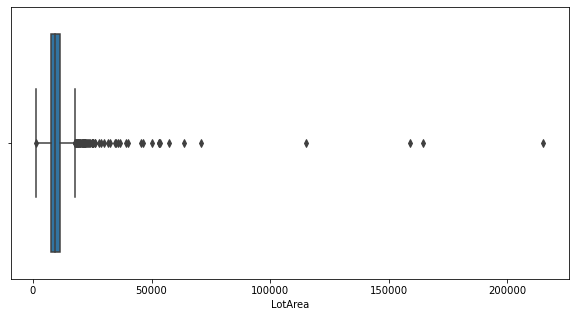

In [34]:
# Outlier detection in 'LotArea' column

plt.figure(figsize=(10,5))
sns.boxplot(house['LotArea'])
plt.show()

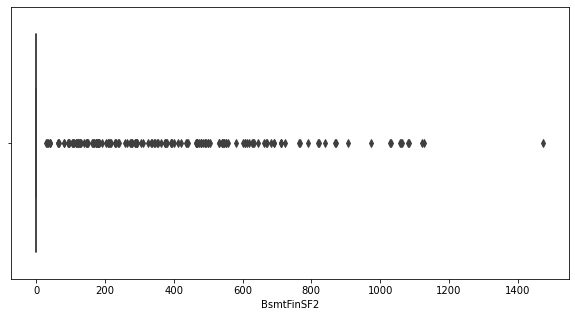

In [35]:
# Outlier detection in 'BsmtFinSF2' column

plt.figure(figsize=(10,5))
sns.boxplot(house['BsmtFinSF2'])
plt.show()

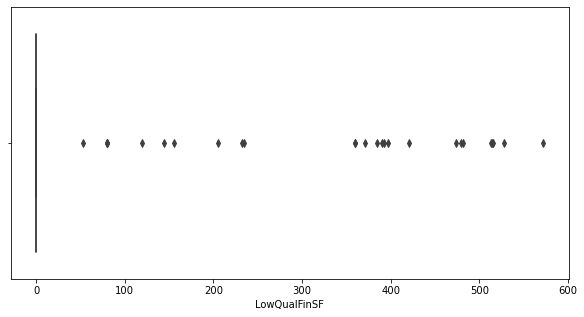

In [36]:
# Outlier detection in 'LowQualFinSF' column

plt.figure(figsize=(10,5))
sns.boxplot(house['LowQualFinSF'])
plt.show()

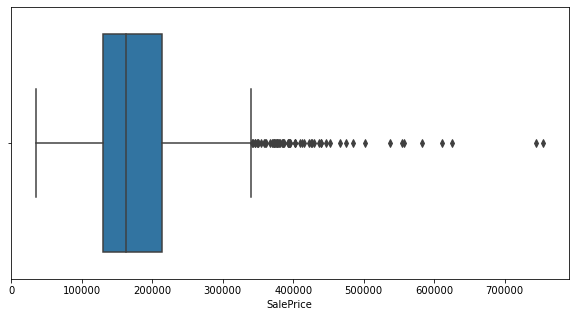

In [37]:
# Outlier detection in 'SalePrice' column

plt.figure(figsize=(10,5))
sns.boxplot(house['SalePrice'])
plt.show()

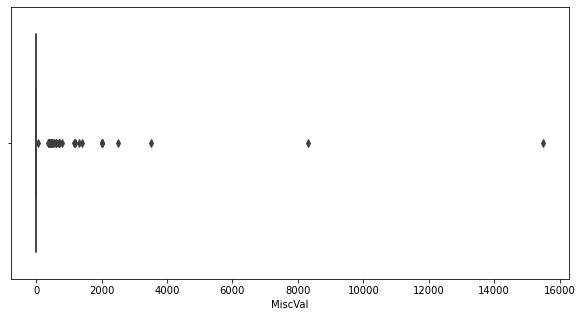

In [38]:
# Outlier detection in 'MiscVal' column

plt.figure(figsize=(10,5))
sns.boxplot(house['MiscVal'])
plt.show()

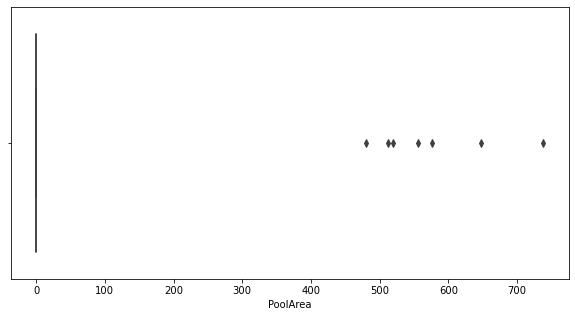

In [39]:
# Outlier detection in 'PoolArea' column

plt.figure(figsize=(10,5))
sns.boxplot(house['PoolArea'])
plt.show()

After checking some variables we have detected outliers

In [40]:
# checking their statistical values
house[['WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']].describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,180624.101999
std,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,79312.128273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129900.000000
50%,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,162500.000000
75%,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
90%,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,278000.000000
95%,335.000000,173.000000,180.000000,0.000000,160.000000,0.000000,0.000000,11.000000,325812.000000
99%,506.000000,286.000000,261.500000,168.000000,268.500000,0.000000,700.000000,12.000000,439390.000000


In [41]:
outlier_columns = ['LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
 'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','PoolArea','MiscVal',
 'MoSold','SalePrice']

In [42]:
# removing outliers for the column presented in the list 'outlier_columns'
for i in outlier_columns:
    q1 = house[i].quantile(0.25)
    q3 = house[i].quantile(0.75)
    IQR = q3-q1
    house = house[~((house[i] < (q1-1.5*IQR)) | (house[i] > (q3+1.5*IQR)) )]


# Step 3: Visualising the Data

#### Univariate  Analysis

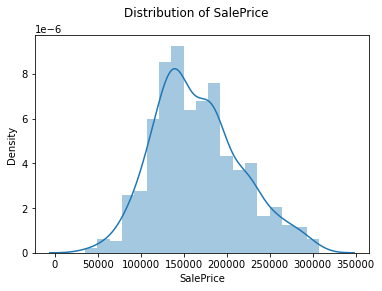

In [43]:
plt.suptitle("Distribution of SalePrice")
sns.distplot(house['SalePrice'])
plt.show()

- We can observe a normal distribution

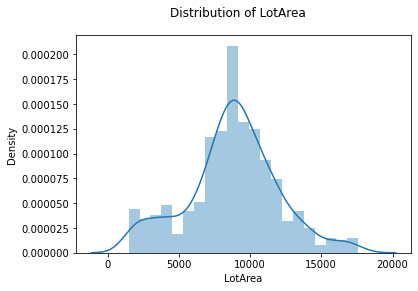

In [44]:
plt.suptitle("Distribution of LotArea")
sns.distplot(house['LotArea'])
plt.show()

#### Bivariate Analysis

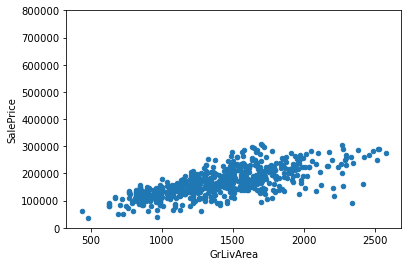

In [45]:
data = pd.concat([house['SalePrice'], house['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

- There seems a bit of a linearity between SalePrice and GrLivArea

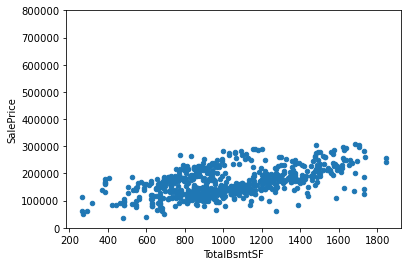

In [46]:
data = pd.concat([house['SalePrice'], house['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

- We can see TotalBsmtSF is also affecting SalePrice.

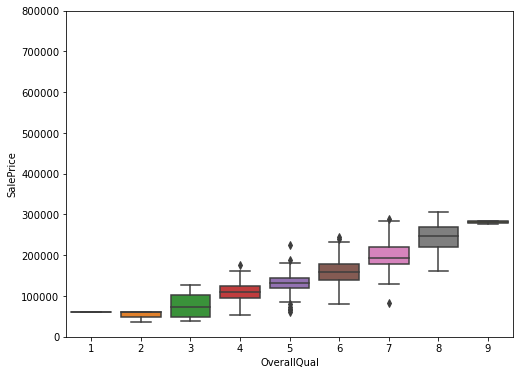

In [47]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

- As the OverallQual is increasing the salePrice is also increasing.

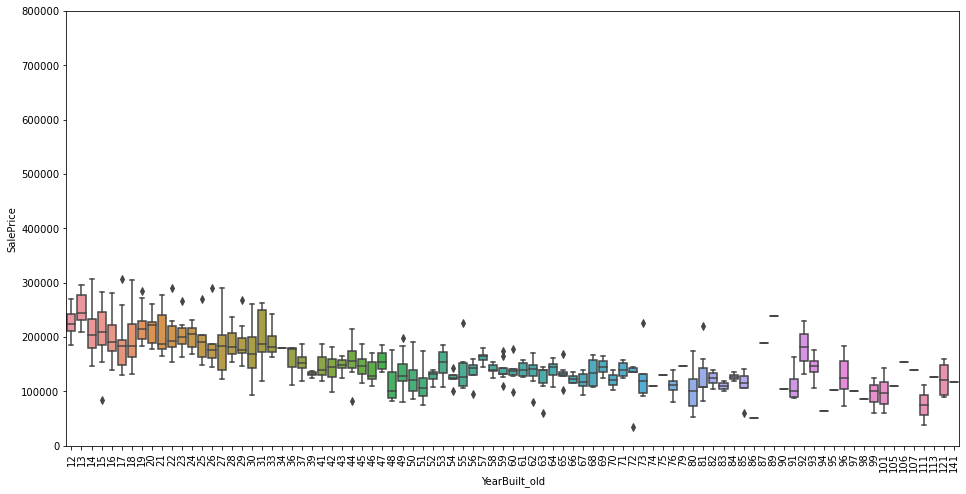

In [48]:
var = 'YearBuilt_old'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

 - Slight increase in the price can be seen over the years. But there is also a lot of inconsistency in increase of 'SalePrice'

#### Checking correlation

In [49]:
# checking correlation
cor=house[['LotArea', 'MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
 'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
 'MoSold','SalePrice']].corr()
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False

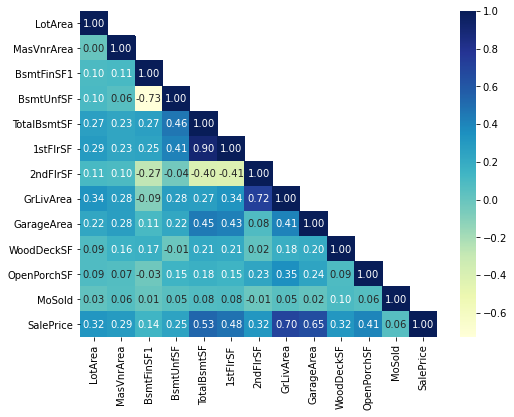

In [50]:
# Heatmap to see correlation between continuous variables
plt.figure(figsize=[8,6])
sns.heatmap(cor,mask=mask, cmap="YlGnBu", annot = True,fmt='.2f')
plt.show()

From Above we can see that 'SalePrice' has highly correlated with 'GrLivArea'.

In [51]:
# Remove unwanted columns 
house = house.drop('Id', axis=1)

# Step 4: Data Preparation

#### Creating a list of all the categorical columns

In [52]:
var_cat = list((house.dtypes[house.dtypes == 'object']).index)
print(var_cat)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [53]:
house.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_old,GarageYrBlt_old,YearRemodAdd_old,YrSold_old
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal,208500,18,18.0,18,13
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal,181500,45,45.0,45,14
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal,223500,20,20.0,19,13
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal,250000,21,21.0,21,13
6,20,RL,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,None,None,None,0,8,WD,Normal,307000,17,17.0,16,14


In [54]:
# Replacing 'Y' and 'N' to 1 and 0 in CentralAir variable
house['CentralAir'] = (house[['CentralAir']]).apply(lambda x: x.map({'Y':1, 'N':0}))
house['CentralAir'].unique()

array([1, 0], dtype=int64)

In [55]:
# After replacing 'CentralAir', we can drop it from categorical list of variable
var_cat.remove('CentralAir')

In [56]:
print(var_cat)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


#### Dummy Variables

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [57]:
# forming dummies of the categorical variable
dummy = pd.get_dummies(house[var_cat],drop_first=True)

In [58]:
dummy.head()

,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Tar&Grv,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_12,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,Fireplaces_1,Fireplaces_2,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,

#### Concatenating the dummy dataset with original one and then removing the original categorical variables

In [59]:
# concatenate the 'dummy' dataset with 'house' dataset
house = pd.concat([house, dummy], axis=1)
house.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_old,GarageYrBlt_old,YearRemodAdd_old,YrSold_old,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,...,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Tar&Grv,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_12,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,Fireplaces_1,Fireplaces_2,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual

#### Dropping the repeated variables

In [60]:
# removing the original categorical columns
house = house.drop(var_cat, axis=1)
house.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_old,GarageYrBlt_old,YearRemodAdd_old,YrSold_old,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Tar&Grv,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_12,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,Fireplaces_1,Fireplaces_2,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8

In [61]:
num_var = list((house.dtypes[(house.dtypes == 'int64') | (house.dtypes=="float64")]).index)
num_var

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'YearBuilt_old',
 'GarageYrBlt_old',
 'YearRemodAdd_old',
 'YrSold_old']

## Step 5: Splitting the Data into Training and Testing Sets



In [62]:
# Forming X and y datasets
y = house.pop('SalePrice')
X = house

In [63]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [64]:
# Printing train and test shape
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (475, 257)
X_test Shape: (204, 257)
y_train Shape: (475,)
y_test Shape: (204,)


#### Rescaling the Features 

In [65]:
# Scalling the Dataset

scaler = StandardScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_var.remove('SalePrice')
X_train[num_var]=scaler.fit_transform(X_train[num_var])
X_train.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_old,GarageYrBlt_old,YearRemodAdd_old,YrSold_old,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Tar&Grv,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_12,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,Fireplaces_1,Fireplaces_2,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
900,-0.462334

In [66]:
X_test[num_var] = scaler.transform(X_test[num_var])
X_test.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_old,GarageYrBlt_old,YearRemodAdd_old,YrSold_old,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Tar&Grv,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_12,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,Fireplaces_1,Fireplaces_2,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
57,0.896349,-

## Step 6: Building our model

#### Running  Linear Regression

In [67]:
# Creating Linear Regression object and fitting on training set
lr = LinearRegression()
lr.fit(X_train,y_train)

# predict train
y_train_pred = lr.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

# predict test
y_test_pred = lr.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.9605764636188554
-7.831215692100105e+19


In [68]:
# Linear Regression parameters
model_parameters = list(lr.coef_)
model_parameters.insert(0, lr.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "Constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(6.286375947082115e+16, 'ScreenPorch'),
 (-5.517551017110212e+16, 'PoolArea'),
 (3.5532124456688996e+16, 'MiscVal'),
 (2.3099676083672824e+16, 'EnclosedPorch'),
 (-1.808984196279478e+16, 'BsmtFinSF2'),
 (-9758424127189484.0, '3SsnPorch'),
 (-7753795163201893.0, 'BsmtUnfSF'),
 (-7120957159585219.0, 'BsmtFinSF1'),
 (5584185017311782.0, '2ndFlrSF'),
 (5318923812051845.0, 'TotalBsmtSF'),
 (-5230247731699571.0, 'GrLivArea'),
 (4076188137829287.5, '1stFlrSF'),
 (-3630618157750198.0, 'MSSubClass_90'),
 (3630618157746270.0, 'BldgType_Duplex'),
 (3339644667248453.0, 'LowQualFinSF'),
 (-3228825351524687.5, 'MSSubClass_160'),
 (-3228825351510311.5, 'MSSubClass_120'),
 (3228825351502933.0, 'BldgType_TwnhsE'),
 (3228825351495505.0, 'BldgType_Twnhs'),
 (-3228825351489501.5, 'MSSubClass_180'),
 (2684142877483724.5, 'MSZoning_FV'),
 (2684142877474902.5, 'MSZoning_RL'),
 (2684142877468409.5, 'MSZoning_RM'),
 (2684142877464223.5, 'MSZoning_RH'),
 (-2588209054089794.0, 'Street_Pave'),
 (-244252569346952

Now we try to predict sales prices so this dataset used to linear regression, to perform rigde and lasso regression

#### Ridge Regression

In [69]:
# list of alphas to tune
params = {'alpha': [ 0.0001,0.001,0.01, 0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,
                    4.0,5.0,6.0,7.0,8.0,9.0 ,10, 20, 45, 48, 50, 100, 200,500,1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    5.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 45, 48,
                                   50, 100, 200, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
# checking the optimum value of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 7.0}
-12556.801270954227


In [71]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049597,0.009329,0.028799,0.010849,0.0001,{'alpha': 0.0001},-19126.548548,-15504.664133,-23520.943881,-20595.587408,-19508.959230,-19651.340640,2582.868036,31,-6041.874553,-6439.833527,-5411.826535,-6049.717952,-6258.234225,-6040.297358,347.042487
1,0.042906,0.014189,0.022317,0.015543,0.001,{'alpha': 0.001},-18854.413653,-15120.933607,-21772.222882,-20207.283421,-18735.436640,-18938.058041,2202.812483,30,-6043.150361,-6434.706983,-5418.052328,-6052.022942,-6264.030807,-6042.392684,344.362647
2,0.038069,0.009566,0.023523,0.009901,0.01,{'alpha': 0.01},-17716.229066,-13836.546208,-18315.128629,-18689.501617,-16175.190525,-16946.519209,1775.973687,28,-6062.953706,-6445.855990,-5454.238821,-6095.308791,-6336.884922,-6079.048446,344.074971
3,0.029305,0.010124,0.018981,0.004099,0.05,{'alpha': 0.05},-16204.107237,-13041.943865,-16617.815167,-16434.148149,-14369.113717,-15333.425627,1400.008511,26,-6176.341906,-6540.443703,-5592.852745,-6216.830589,-6524.652722,-6210.224333,343.583871
4,0.028766,0.008130,0.014330,0.007826,0.1,{'alpha': 0.1},-15605.609665,-12748.039552,-16038.379180,-15176.910178,-13699.373361,-14653.662387,1236.082392,25,-6270.605900,-6642.726960,-5731.813451,-6352.059851,-6654.396156,-6330.320463,336.116631


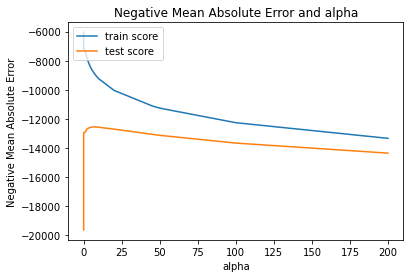

In [72]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [73]:
# Check best estimator for lambda
print(model_cv.best_estimator_)

Ridge(alpha=7.0)


In [74]:
# Fitting Ridge model for alpha = 7 and printing coefficients which have been penalised
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.64110930e+03,  3.38975596e+02,  5.62694075e+03,  0.00000000e+00,
       -1.20443412e+01,  7.51577125e+03, -3.68992375e+02,  3.44429739e+03,
        8.40014113e+03,  0.00000000e+00,  1.16528986e+04,  4.37776558e+03,
        2.88145306e+02,  9.81554041e+02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.29459824e+03,
       -8.74280724e+03, -1.95705913e+03, -1.66805043e+03,  2.14255618e+01,
        5.44690910e+02,  1.37442948e+03,  1.58963182e+03, -3.48553985e+02,
        5.50835438e+03, -3.46180440e+02, -9.64052208e+02, -1.43255251e+03,
       -2.59876840e+03, -7.92255498e+03,  1.17905758e+03, -2.44397415e+03,
        4.97108268e+03, -2.74046771e+03,  1.65383548e+03, -3.88445044e+03,
        0.00000000e+00,  5.87520527e+03,  1.94144463e+02, -7.48133747e+02,
        1.75645340e+03, -3.88836766e+02, -3.90888543e+02, -7.36064898e+02,
       -3.99495510e+03,  1.57666829e+03, -4.77957178e+03,  3.12238827e+01,
       -2.43999099e+03,  

In [75]:
# Predicting for train and test, calculating R square
y_train_pred=ridge.predict(X_train)
print("R square for training set:",r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred=ridge.predict(X_test)
print("R square for testing set:",r2_score(y_true=y_test,y_pred=y_test_pred))

R square for training set: 0.9384535040384445
R square for testing set: 0.9072627677362294


####  Lasso Regression

In [76]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:   59.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 45, 48,
                                   50, 100, 200, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
# checking the optimum value of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-12639.36199886449


In [78]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.481907,0.063045,0.018891,0.006548,0.0001,{'alpha': 0.0001},-18252.826214,-15900.456799,-18394.525712,-19908.407633,-17339.561038,-17959.155479,1318.901909,31,-6044.993775,-6450.708730,-5449.510340,-6058.578964,-6294.125285,-6059.583419,340.702781
1,0.480765,0.027376,0.023841,0.007331,0.001,{'alpha': 0.001},-18232.833802,-15876.022083,-18396.222062,-19906.621857,-17337.665437,-17949.873048,1325.429448,30,-6044.961505,-6450.678493,-5449.509678,-6058.586425,-6294.171654,-6059.581551,340.702733
2,0.412466,0.015918,0.015625,0.009882,0.01,{'alpha': 0.01},-18033.086262,-15631.092756,-18424.184084,-19888.998892,-17318.609971,-17859.194393,1394.720507,29,-6044.720507,-6450.412762,-5449.595857,-6058.824776,-6294.808084,-6059.672397,340.700598
3,0.439523,0.066199,0.022156,0.008037,0.05,{'alpha': 0.05},-17581.836545,-14935.793429,-18525.995862,-19813.782194,-17224.637062,-17616.409018,1612.214474,28,-6044.114820,-6449.612663,-5450.496746,-6060.256798,-6297.921600,-6060.480525,340.631819
4,0.467145,0.054240,0.026960,0.006432,0.1,{'alpha': 0.1},-17620.796492,-14733.034525,-18464.942629,-19720.712735,-17101.667127,-17528.230702,1654.572650,27,-6044.419027,-6448.237732,-5451.701835,-6062.089211,-6302.541948,-6061.797951,340.532747


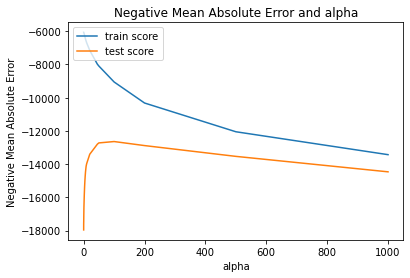

In [79]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [80]:
# Check best estimator for lambda
print(model_cv.best_estimator_)

Lasso(alpha=100)


In [81]:
# Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([   928.59215207,    240.64078857,   5911.1329112 ,      0.        ,
           -0.        ,   5874.24298825,   -353.38113667,     -0.        ,
          931.45065748,      0.        ,  18917.00908126,   4711.93424214,
          450.10045377,    671.12649622,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,    988.71486539,
       -10129.21063878,  -1603.95441443,   -826.20950014,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,     -0.        ,     -0.        ,
           -0.        ,  -8044.03705246,     -0.        ,     -0.        ,
            0.        ,     -0.        ,      0.        ,  -1706.22451699,
            0.        ,   3948.83440186,      0.        ,     -0.        ,
            0.        ,   -885.53722797,     -0.        ,      0.        ,
        -3383.22937765,    299.33741569,  -2541.23238555,      0.        ,
        -1992.69710199,  

In [82]:
# Predicting for train and test, calculating R square
y_train_pred=lasso.predict(X_train)
print("R square for training set:",r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred=lasso.predict(X_test)
print("R square for testing set:",r2_score(y_true=y_test,y_pred=y_test_pred))

R square for training set: 0.9328736046131237
R square for testing set: 0.902724776792393


In [83]:
col = (house.columns[lasso.coef_!=0])

In [84]:
X_train = X_train[col]
X_test = X_test[col]

#### Model with optimal alpha

In [85]:

# lasso regression
lm = Lasso(alpha=100)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print("R square for training set:",r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print("R square for testing set:",r2_score(y_true=y_test, y_pred=y_test_pred))

R square for training set: 0.9328788023657787
R square for testing set: 0.9027114549187294


- The r2 score for the train dataset is 93.28% and and that of Test dataset is 90.27%

In [86]:
#  Predicting top features of model based on ridge model
model_parameters = list(ridge.coef_)

model_parameters = pd.Series([round(x, 3) for x in model_parameters])
cols = pd.Series(X.columns)
coeff_ridge = pd.concat([cols, model_parameters], axis=1, keys=['Features', 'Coefficients'])
coeff_ridge = coeff_ridge.sort_values(by='Coefficients', ascending=False)

In [87]:
print(coeff_ridge.head().Features.values)

['OverallQual_8' 'GrLivArea' 'Neighborhood_Crawfor' 'Condition1_Norm'
 '2ndFlrSF']


In [88]:
coeff_ridge.head()

,Features,Coefficients
102,OverallQual_8,11811.060
10,GrLivArea,11652.899
59,Neighborhood_Crawfor,11234.974
79,Condition1_Norm,9700.606
8,2ndFlrSF,8400.141


In [89]:
# Predicting top features of model based on lasso model 
model_parameters = list(lasso.coef_)

model_parameters = pd.Series([round(x, 3) for x in model_parameters])
cols = pd.Series(X.columns)
coeff_lasso = pd.concat([cols, model_parameters], axis=1, keys=['Features', 'Coefficients'])
coeff_lasso = coeff_lasso.sort_values(by='Coefficients', ascending=False)

In [90]:
coeff_lasso.head()

,Features,Coefficients
59,Neighborhood_Crawfor,21921.746
10,GrLivArea,18917.009
102,OverallQual_8,18718.903
103,OverallQual_9,13505.951
227,GarageCars_3,10434.899


In [91]:
print(coeff_lasso.head().Features.values)

['Neighborhood_Crawfor' 'GrLivArea' 'OverallQual_8' 'OverallQual_9'
 'GarageCars_3']


In [92]:
# The top 10 variables responsible for price pridiction
list(coeff_lasso['Features'].head(10))

['Neighborhood_Crawfor',
 'GrLivArea',
 'OverallQual_8',
 'OverallQual_9',
 'GarageCars_3',
 'Functional_Typ',
 'Neighborhood_Somerst',
 'FullBath_3',
 'Condition1_Norm',
 'OverallCond_8']

#### Conclusion


- The Optimum lambda value for Lasso Regression is 100
- The Optimum lambda value for Ridge Regression is 7
- The model accuracy for train and test set for both the models are almost similar
- Lasso Regression helps in feature reduction (as the coefficient value of one of the feature became 0),so lasso is better than ridge

These are the top 10 Features that affecting the most to the House pricing are, 'Neighborhood_Crawfor',
 'GrLivArea',
 'OverallQual_8',
 'OverallQual_9',
 'GarageCars_3',
 'Functional_Typ',
 'Neighborhood_Somerst',
 'FullBath_3',
 'Condition1_Norm',
 'OverallCond_8'.</font>

#### Performing Subjective Questions

##### Questions 1:

Checking model ridge and lasso after double alpha value

In [93]:
# Fitting Ridge model for alpha = 14 and printing coefficients which have been penalised
alpha = 14
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2143.58489784,   768.77628215,  5642.17605686,  8159.53818959,
         332.35825463,  4330.61783058, 14406.52232147,  5948.15669744,
         546.10808476,  1083.74141492,  1142.18622184, -7421.1829969 ,
       -2450.50402695, -1982.93007052, -5940.21847544, -4903.04002653,
        3698.56090738,  -499.74288594, -4594.20119294,  1198.91114449,
       -3012.722133  , -1928.80537958,  3189.52917407,  2893.38948684,
        9215.60048333, -5509.1008516 , -3542.00047999, -2450.99033681,
        -968.74225381,  3141.4583905 , -5725.16800864, -2353.83235417,
        7180.98689926,  8976.65214726,  2935.93089964, -4668.7869853 ,
       -5511.64582276, -2443.47339003, -4705.60749552, -4138.42812366,
        2555.07328236, 13514.83923535,  4595.76690757, -8413.92468553,
       -5989.96184063, -4066.59483632,  6864.68220714,  5653.62167784,
        3520.17953032,  4407.76256512,  3255.58238654, -2816.55365637,
       -1268.41736521, -2186.8529407 ,  1789.5913018 , -4246.76346095,
      

In [94]:
# Predicting for train and test, calculating R square
y_train_pred=ridge.predict(X_train)
print("R square for training set:",r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred=ridge.predict(X_test)
print("R square for testing set:",r2_score(y_true=y_test,y_pred=y_test_pred))

R square for training set: 0.9226964475708388
R square for testing set: 0.902772869917953


In [95]:
#  Predicting top features of model based on ridge model
model_parameters = list(ridge.coef_)

model_parameters = pd.Series([round(x, 3) for x in model_parameters])
cols = pd.Series(X.columns)
coeff_ridge1 = pd.concat([cols, model_parameters], axis=1, keys=['Features', 'Coefficients'])
coeff_ridge1 = coeff_ridge1.sort_values(by='Coefficients', ascending=False)

In [96]:
coeff_ridge1.head()

,Features,Coefficients
6,CentralAir,14406.522
41,Alley_None,13514.839
24,MSSubClass_30,9215.600
33,MSSubClass_160,8976.652
3,BsmtFinSF2,8159.538


In [97]:

print(coeff_ridge1.head().Features.values)

['CentralAir' 'Alley_None' 'MSSubClass_30' 'MSSubClass_160' 'BsmtFinSF2']


In [98]:
# Fitting Lasso model for alpha = 200 and printing coefficients which have been penalised
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([  1312.46694445,    255.05669742,   5744.15493444,   5498.62727203,
           -0.        ,    398.26384143,  20105.36852635,   5722.72532187,
          660.66534596,    880.76263627,    900.48362309,  -9800.25945731,
        -1623.55440952,  -1352.9808114 ,  -9555.59694274,  -3861.18742213,
          402.11769128,   -818.61171788,  -4181.60363202,      0.        ,
           -0.        ,  -1314.44414711,      0.        ,    229.96633178,
        14579.42875964,  -2636.73575381,     -0.        ,     -0.        ,
           -0.        ,      0.        ,  -4338.01854758,     -0.        ,
         6609.57516193,   9955.14739729,      0.        ,     -0.        ,
        -2668.26636137,   -260.64910227,  -3254.5952447 ,  -1845.99482686,
         4010.38649669,  18928.04981881,      0.        , -14318.8960117 ,
        -5822.54150538,  -4336.05091165,   5994.02556716,   5829.10118072,
            0.        ,      0.        ,   2299.58451428,  -1918.4106342 ,
           -0.        ,  

In [99]:
# Predicting for train and test, calculating R square
y_train_pred=lasso.predict(X_train)
print("R square for training set:",r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred=lasso.predict(X_test)
print("R square for testing set:",r2_score(y_true=y_test,y_pred=y_test_pred))

R square for training set: 0.9130423028560991
R square for testing set: 0.8981619039406895


In [100]:
# Predicting top features of model based on lasso model 
model_parameters = list(lasso.coef_)

model_parameters = pd.Series([round(x, 3) for x in model_parameters])
cols = pd.Series(X.columns)
coeff_lasso1 = pd.concat([cols, model_parameters], axis=1, keys=['Features', 'Coefficients'])
coeff_lasso1 = coeff_lasso1.sort_values(by='Coefficients', ascending=False)

In [101]:
coeff_lasso1.head()

,Features,Coefficients
6,CentralAir,20105.369
41,Alley_None,18928.050
24,MSSubClass_30,14579.429
86,Condition2_RRAn,10342.396
33,MSSubClass_160,9955.147


In [102]:

print(coeff_lasso1.head().Features.values)

['CentralAir' 'Alley_None' 'MSSubClass_30' 'Condition2_RRAn'
 'MSSubClass_160']


##### Questions 3:

In [103]:
top_drop=coeff_lasso.sort_values(by='Coefficients', ascending=False).head().Features.values
top_drop

array(['Neighborhood_Crawfor', 'GrLivArea', 'OverallQual_8',
       'OverallQual_9', 'GarageCars_3'], dtype=object)

In [104]:
X_train_new = X_train.drop(top_drop,axis=1)
X_test_new = X_test.drop(top_drop,axis=1)

In [105]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    7.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 45, 48,
                                   50, 100, 200, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
# Check best estimator for lambda
print(model_cv.best_estimator_)

Lasso(alpha=100)


In [107]:
# Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [108]:
# Predicting for train and test, calculating R square
y_train_pred=lasso.predict(X_train_new)
print("R square for training set:",r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred=lasso.predict(X_test_new)
print("R square for testing set:",r2_score(y_true=y_test,y_pred=y_test_pred))

R square for training set: 0.91708788181631
R square for testing set: 0.8760957272082578


In [109]:
# Predicting top features of model based on lasso model 
model_parameters = list(lasso.coef_)

model_parameters = pd.Series([round(x, 3) for x in model_parameters])
cols = pd.Series(X.columns)
coeff_lasso2 = pd.concat([cols, model_parameters], axis=1, keys=['Features', 'Coefficients'])
coeff_lasso2 = coeff_lasso2.sort_values(by='Coefficients', ascending=False)

In [110]:
print(coeff_lasso2.head().Features.values)

['TotalBsmtSF' 'BsmtFinSF2' 'Neighborhood_NridgHt' 'MSSubClass_85'
 'MSSubClass_90']
